## What is the OOB (Out-of-Bag) Score?

The Out-of-Bag (OOB) score is an internal validation metric used by Random Forests (and other bagging methods).

When a Random Forest is trained:

- Each tree is trained on a bootstrap sample (a random sample with replacement from the training data).
- On average, about 63% of the training samples are used for any given tree.
- The remaining 37% are “out-of-bag” for that tree — meaning they were not seen during its training.

The model can then predict these OOB samples (since that tree hasn’t seen them before).
By aggregating predictions across all trees, you get the OOB score, which is like a built-in cross-validation estimate of model performance.

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

In [27]:
np.random.seed(42)

X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

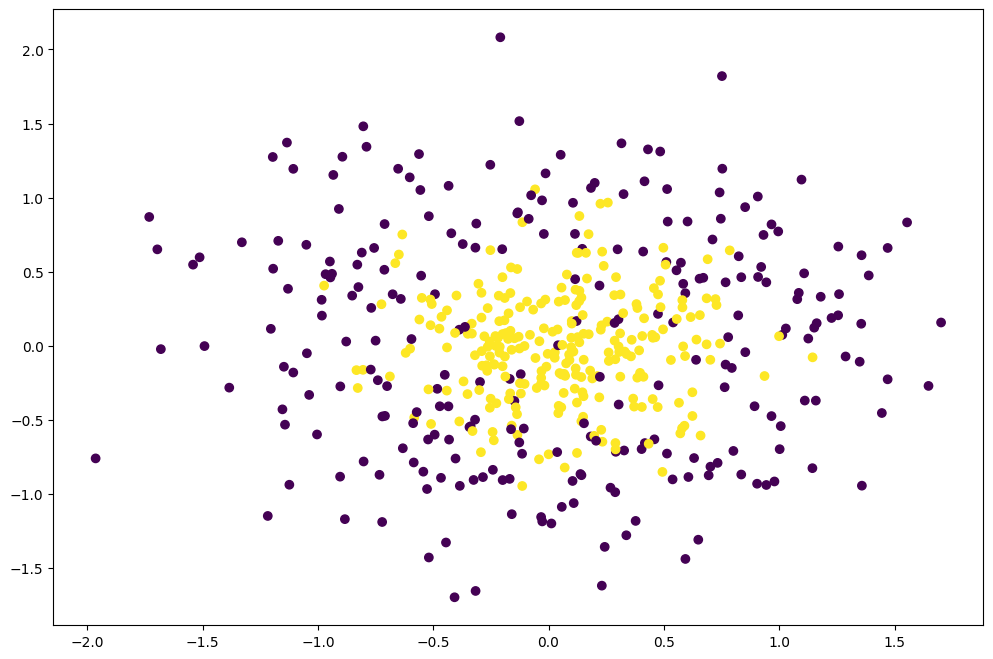

In [29]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

## Random Forest Classifier (OOB Score)

In [30]:
rf = RandomForestClassifier(n_estimators=500, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, oob_score=True)

In [31]:
print(np.round(rf.oob_score_, 2))

0.8


In [32]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.89